# 1 引言

本文参考中国银河证券研报《多因子系列: 多因子模型体系之因子组合的确定》以及聚宽用户**西安交大元老师量化小组**的代码以及思路，感谢他们的帮助与指导。

<b>研究目的：</b>  

分析师黎鹏将多因子策略的构建分为四步：因子筛选、收益预测、风险预测和组合优化。本报告完成模型的第一步: 因子筛选。本报告通过可视化的方式，对8个比较具有代表性的因子进行三个指标上的分析。

<b>研究内容：</b>  

（1）首先，从基准的角度获取较为通用的因子。考虑到常见基准和是否有对应期货两方面因素，本文的基础基准设定为上证 50（IH），沪深 300（IF）和中证 500（IC），考虑到这三个基准的编制方式以及个股的通用性质，本文对以下 8 个因子进行研究：市值、股本、roe、净利润增长率（成长性因子）、PE（价值）、换手率、EPS 以及成交量。  
（2）根据因子在指数成分股中的暴露分析，从基准的角度看，因子是否通用，是否能代表基准明显的特征；  
（3）分析因子之间的相关性，避免相关性过高的因子进入因子组合，相关性过高的因子对于线性模型而言，往往导致模型出现较大误差，使得模型的预测能力下降；  
（4）通过研究因子 IC，分析因子解释力度是否较强，判断因子对个股未来收益的预测能力。

<b>研究结论：</b>  

组合的评判标准分为三点：因子暴露度、因子相关强度和因子选个股能力，相关结论如下：  
（1） 三大股指的市值和股本因子的偏离度均是最高的。中等偏离度的因子包括，换手率、ROE、PE、EPS 因子。偏离度最小的是净利润增长率因子。  
（2） 相关强度最低的组合为净利润增长率和成交量，换手率和 EPS，ROE 和换手率，股本和换手率。  
（3） 除了换手率因子较强，净利润增长率较弱之外，其他因子的选股能力区别不大。  


# 2 研究思路

## 2.1 研究方法

在多因子策略的构件上，分析师黎鹏的思路是因子筛选、收益预测、风险预测和组合优化。其中，综合筛选暴露度高、相关强度低和选股能力强的因子，股本和换手率作为因子组合。然后再对该因子组合进行收益、风险、优化等方面的分析。而在学术界的研究范式中，多因子策略的构建遵循的顺序是：使用排序法构建因子投资组合、计算因子收益率，并通过时序回归确定资产在因子上的暴露。本报告将会以可视化的方式，对因子的三个维度进行分析。

## 2.2 基准

本报告选用上证50、沪深300和中证500作为基准分析各因子的表现，其中，这三个基准的编制规则如下：

 

| 指数名称      | 股票池           | 股票个数  |加权方法  |选股条件  |对应因子  |
| ------------- |:-------------:| -----:| -----:| -----:| -----:|
| 上证 50       | 上证180     | 50     | 派许加权 + 调整股本     |规模、流动性     |流通市值、成交金额     |
| 沪深 300      | 全 A 股      |   300 |派许加权 + 调整股本     |规模     |日均总市值     |
| 中证 500      | 全 A 股扣除市值最大的 300 只      |    500 |派许加权 + 调整股本     |规模     |日均总市值     |


## 2.3 因子

1. **市值：**市值是指股票的市场价值，也就是以股票的市场价格计算的总价值。总市值是以目前股票市价乘以总股本，流通市值是以目前股票市价乘以流通股本。<br><br>
2. **股本：**股份资本，是经公司章程授权、代表公司所有权的全部股份，既包括普通股也包括优先股，为构成公司股东权益的两个组成部分之一。股本的大小会随着送股和配股而增加，但市价不会改变，这是由于送配股后除权的原因。<br><br>
3. **EPS：** Earning Per Share, 每股盈余，即公司帮股东赚钱的能力。<br><br>
4. **ROE：**Rate of Return on Common Stockholders’ Equity，净资产收益率。ROE是衡量公司赚钱效率的指标，意味着投入同样价值的净资产，高ROE的公司能产生更多的净利润。<br><br>
5. **净利润增长率：**净利润增长率指利润总额减所得税后的余额是当年实现的可供出资人（股东）分配的净收益，净利润的多寡取决于利润总额和所得税。净利润增长率是一个企业经营的最终成果，也是衡量一个企业经营效益的重要指标，净利润多，企业的经营效益就好；净利润少，企业的经营效益就差。<br><br>
6. **PE：**Price-to-Earning Ratio，指当前总市值除以一年的总净利润。市盈率可以表示，假定未来每股盈利不变，你投资股市需要多少年收回成本。<br><br>
7. **换手率：**换手率也称周转率，指在一定时间内市场中股票转手买卖的频率，其数值为某只股票的累计成交量与其流通股本之间的比率，是反映股票流通性强弱的指标之一，可以有效地帮助投资者识别一只股票的活跃度。

| 因子名称      | 编制方法           | 因子描述  |
| ------------- |:-------------:| -----:|
| 市值       | 总市值 = 个股当日股价 $\times$ 当日总股本  | 规模相关，信息包含股本和股价     | 
| 股本      | 报表科目，详见会计报表     |  规模相关 |
| EPS     | 当期净利润 / 普通股加权平均   |  业绩相关 |
| Roe      | 归属母公司股东的净利润占比 $\times$ 销售净利率 $\times$ 资产周转率 $\times$ 权益乘数     |  盈利能力相关 |
| 净利润增长率   | (本期 -上年同期调整数 ) / ABS上年同期调整数 $\times$ 100%   |  成长能力相关 |
| PE   | 市值 / 当期净利润   |  估值因子 |
| 换手率   | 成交量 / 总股数   |  行情相关 |

## 2.4 因子暴露度

一个因子代表了不同资产收益率的某种驱动力，而该因子的收益率就是这些资产的共性收益。如果说因子是抽象的，那么因子模拟投资组合就是这个抽象概念的实际载体，它是定量研究和使用因子的出发点。这种投资组合是使用股票资产、围绕某目标因子构建的，它需要满足两个条件：<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;1. 该投资组合尽在目标因子上有大于零的暴露、在其它因子上的暴露为零;<br>
&nbsp;&nbsp;&nbsp;&nbsp;2. 在所有满足条件一的投资组合中，该投资组合的特质性风险最小。

在研报中，分析师黎鹏给出了一个计算因子暴露的方法计算步骤如下:
1. 将每日因子按 照从大到小排序；  
2. 从中取出属于某一指数的成份股，计算因子的排序平均值；  
3. 暴露度= (指数因子排序平均值 - 当日全市场排序中间值)/当日股票总个数

计算中，以周为频率测算因子相对于全市场的偏离程度,考虑到可比性和统一标尺，使用的数据为因子当日的排序

## 2.5 因子相关性

对因子做分析及选取时，会尽量选择相关性较小的因子组合，一方面可以减少因子个数，另一方面可以避免出现共线性等问题。本报告中，会通过**相关强度**这一指标对因子之间的相关性进行分析。它的计算方法是：<br><br>
<center>$相关强度 = mean(Corr) / std(corr)$ </center>

## 2.6 因子IC值

IC:信息系数(Information Coefficient,简称 IC)，代表因子预测股票收益的能力。IC的计算方法思路：计算全部股票在调仓周期期初排名和调仓周期期末收益排名的线性相关度(Correlation)。IC越大的因子，选股能力就越强。

在具体的计算方法上，按照分析师黎鹏的思路，可以这样做:  
（1）选出股票池，比如从全市场中选出属于上证 50 成份股的个股；  
（2）因子按照从大到小排序；  
（3）后一日收益率按照从大到小排序；  
（4）计算两个排序之间的相关性，即计算Rank IC。

# 3 研究结论

## 3.1 因子暴露分析

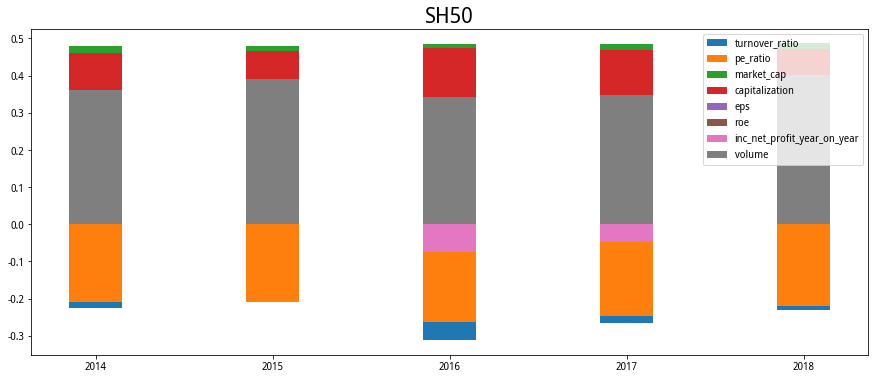

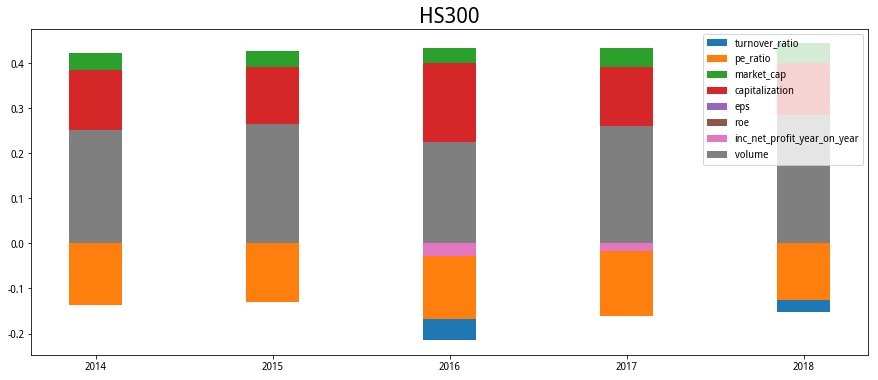

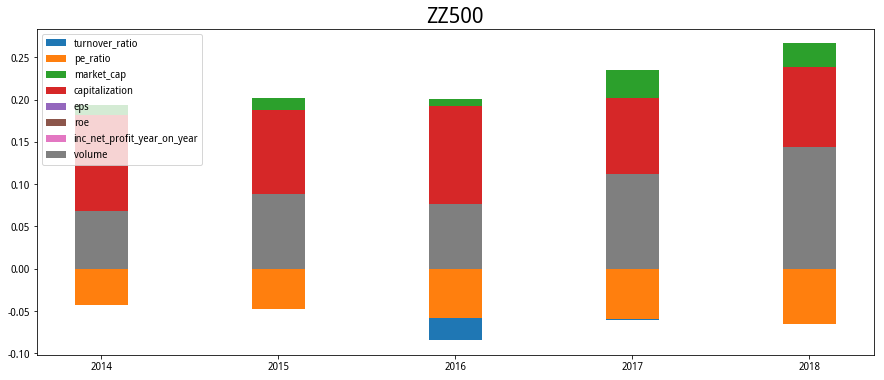

In [8]:
plt.legend()
plt.show()

上图展示的结果为分年度因子暴露，横坐标是年度，颜色点代表当年的因子暴露情况。比如，在2014年中证500指数中，因子暴露最大的是市值，达到了20%左右，而第二大的是股本，因子暴露度接近20%。

由上图可以看出：  
（1）市值和股本因子的偏离度在每一年均是最高的。上证 50 市值和股本的偏离度稳定 50%，沪深300的偏离度稳定在 40%，而中证 500 的偏离度从最初 20% 左右逐年提升至 25%；   
（2）净利润增长率因子在每一年都接近 0，可见该因子对三大股指的有效性较低。

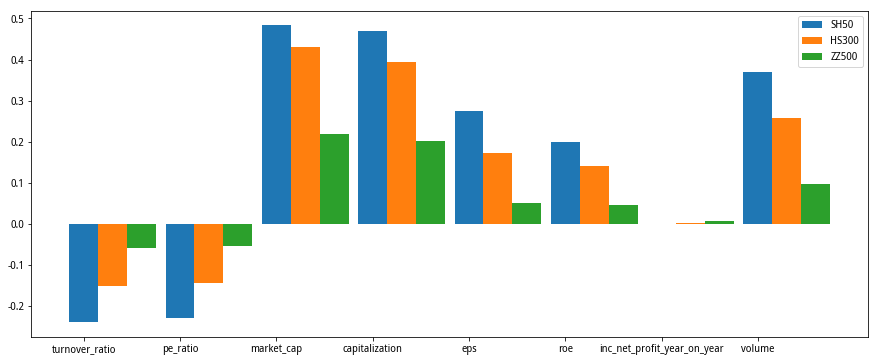

In [9]:
plt.legend()
plt.show()

以上分别统计了三大股指的因子暴露情况，统计了各个因子在 2014 年至 2019 年的平均暴露。从整体上来看:  
（1）市值和股本因子的偏离度均是最高的。上证 50 市值和股本的偏离度稳定在 50% 左右，沪深 300 的偏离度稳定在 40% 左右，而中证 500 的在 20% 左右。
（2）中等偏离度的因子包括，换手率、ROE、PE、EPS 因子。这些因子在上证 50 和沪深 300 指数的偏离度在 20% - 30% 左右，然而中证 500 只有 10%以下。  
（3） 偏离度最小的是净利润增长率因子，在三大指数中，净利润增长率的偏离度几乎为 0。也就是说大市值和小市值个股在成长性方面看，差异不大。可以考虑将该因子移出风险因子库。  

## 3.2 因子相关性分析

### 3.2.1 因子相关性大小

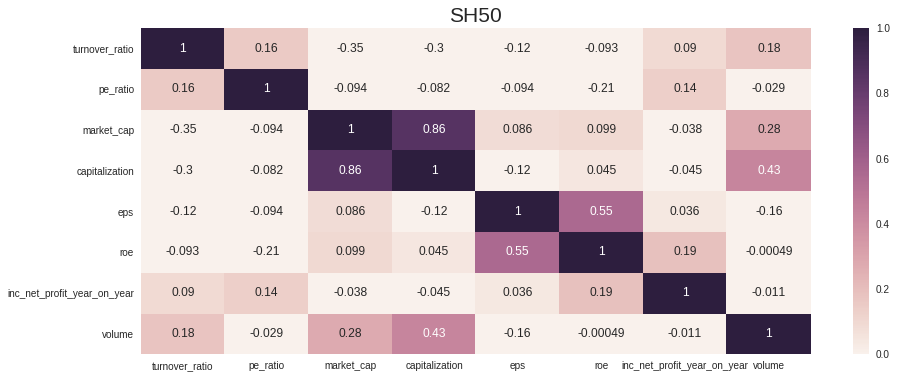

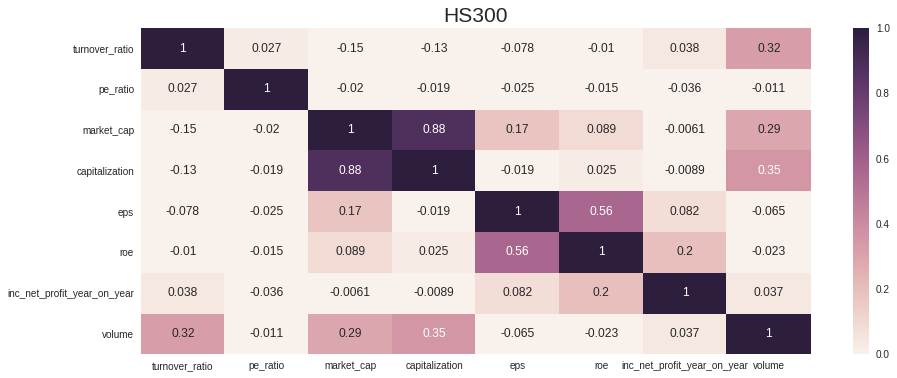

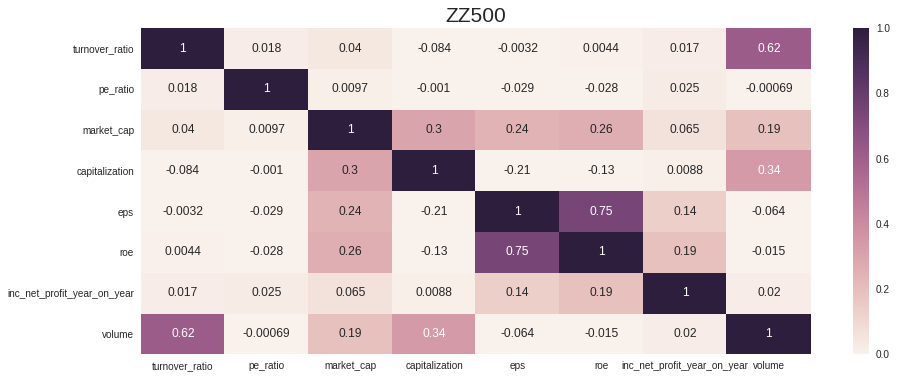

In [11]:
fig.show()

上表分别展示了各因子在三大股指中的相关性，测试时间段为 2014 年至 2019 年共 5 年 时间。根据上表的展示结果，得出结论如下所示：  
（1）从上证 50 指数成份股的角度看，相关性最高的因子为股本和成交量，达到了 0.86，其次为 eps 和 roe，为0.55；  
（2）从沪深 300 成份股的角度看，和上证 50 相似，但换手率和市值的相关性降低；    
（3）从中证 500 成份股的角度看，和其他两个指数相似，换手率和市值的相关性进一步降低。   


### 3.2.2 因子相关性标准差

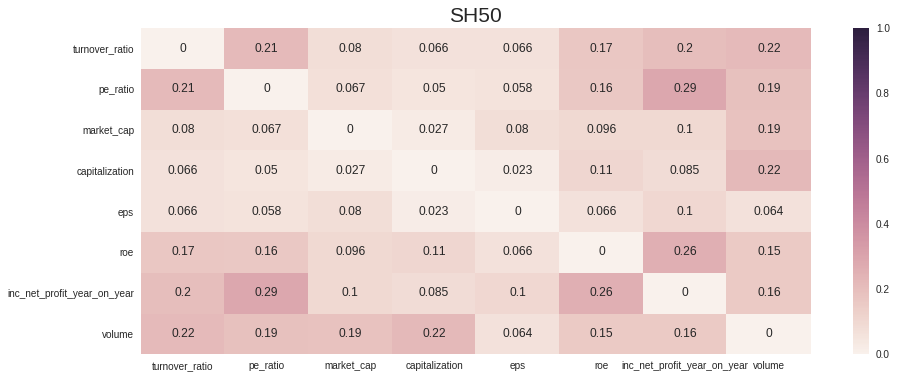

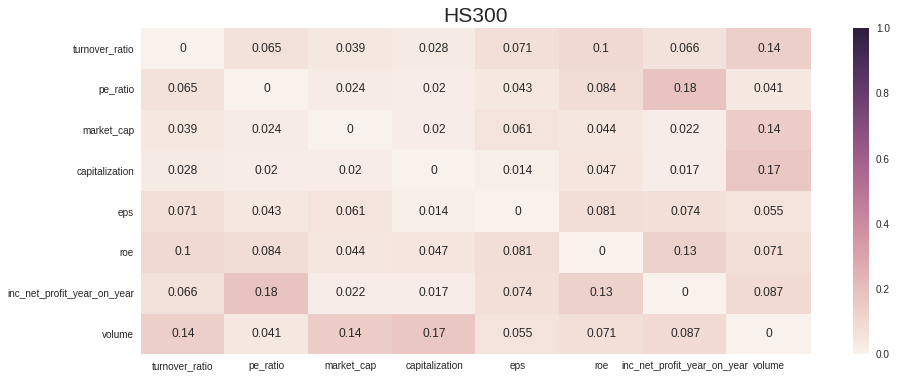

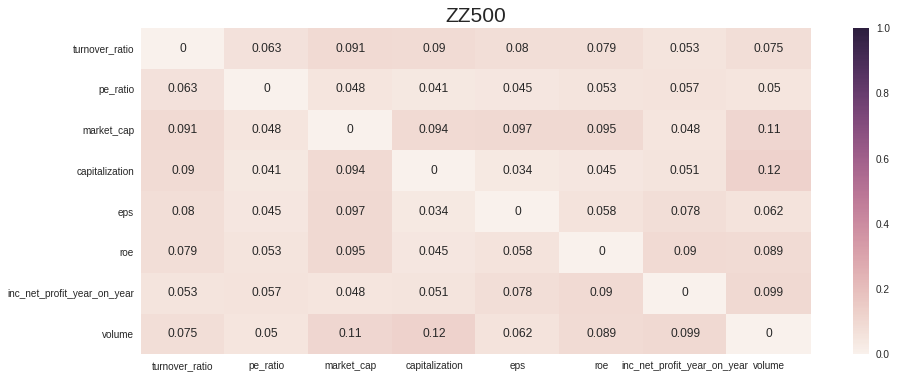

In [12]:
fig.show()

上表分别展示了各因子在三大股指中的相关性标准差，测试时间段为 2014 年至 2019 年共 5 年 时间。根据上表的展示结果，得出结论如下所示：  
（1）从上证 50 指数成份股的角度看，波动性最高的为净利润增长率和 PE，其次是净利润增长率和 ROE；  
（2）从沪深 300 成份股的角度看，和上证 50 相似，但波动性降低；  
（3）从中证 500 成份股的角度看，和其他两个指数相似，但波动性进一步降低。  


### 3.2.3 因子相关性强度

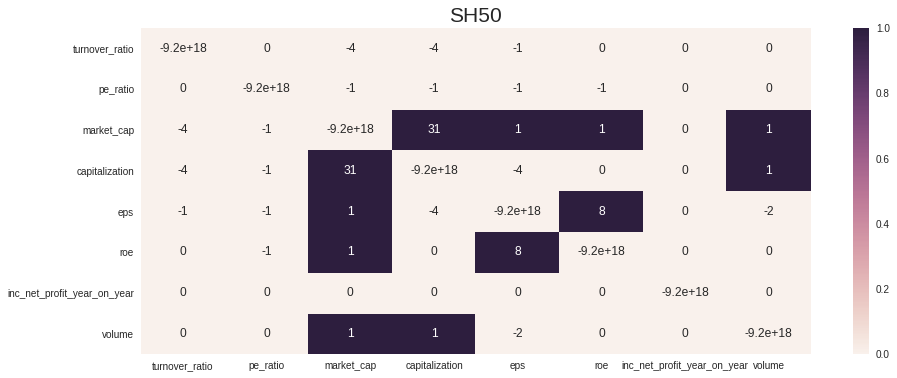

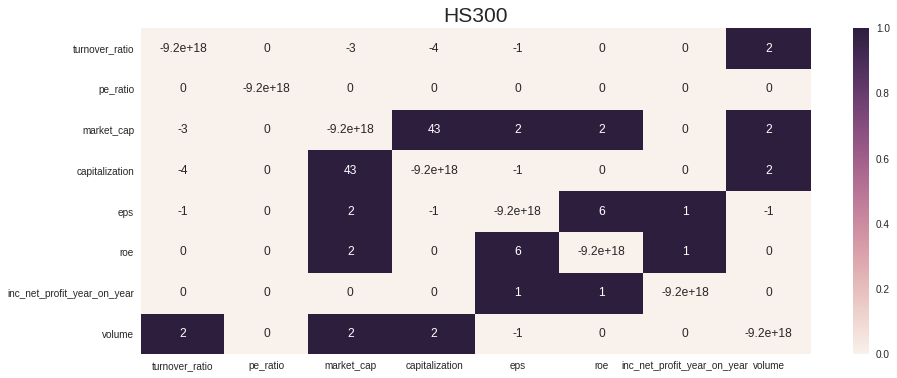

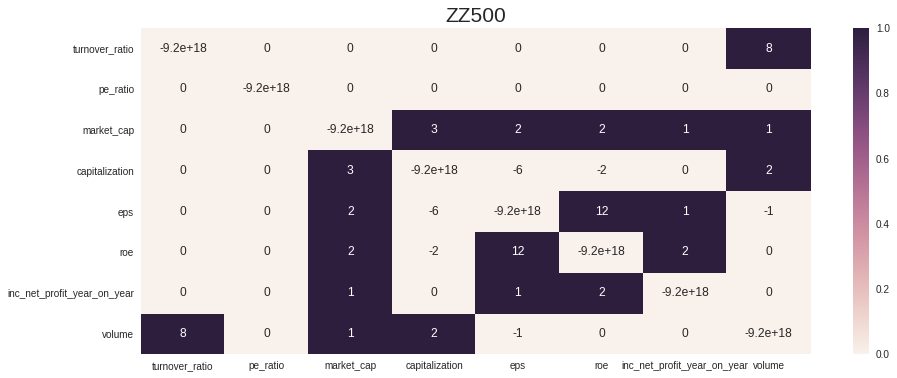

In [15]:
fig.show()

从相关强度表中可以得出以下结论：  
（1）对于这三个指数，ROE 和 EPS 因子是有明显稳定的相关性的，股本与市值也有着较强的相关性;  
（2）其他因子之间的相关强度的绝对值基本在 1-5 之间;  
（3）相关强度最低的组合为净利润增长率和成交量，换手率和 EPS， ROE 和换手率，股本和换手率等。

## 3.3 因子IC值分析

### 3.3.1 因子IC值均值

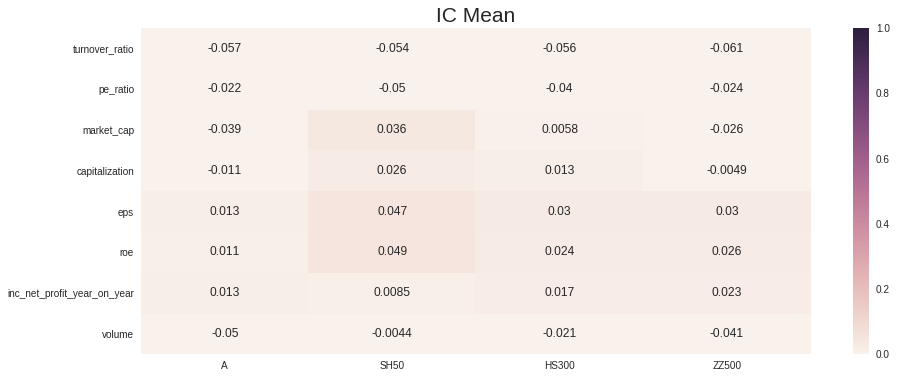

In [17]:
fig.show()

全市场和三大股指中各因子 IC 的周平均 IC 值均在±1%以上，说明因子的解释力度都不错。其中，换手率的选股能力最强，其次为成交量因子，而股本因子效果在所有因子中最差。  

而对于IC均值的波动性：

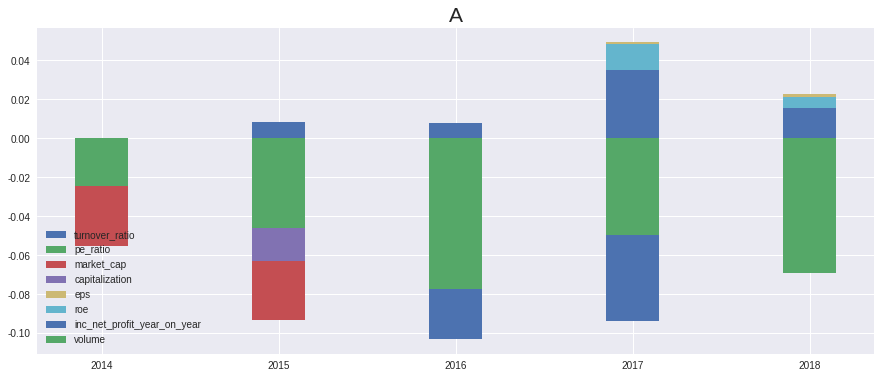

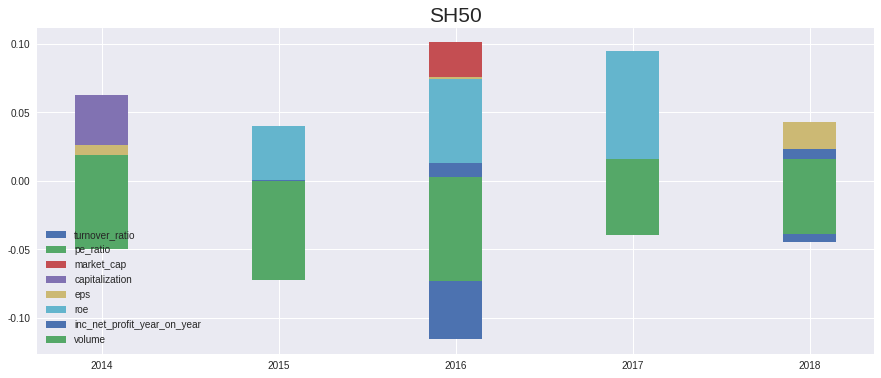

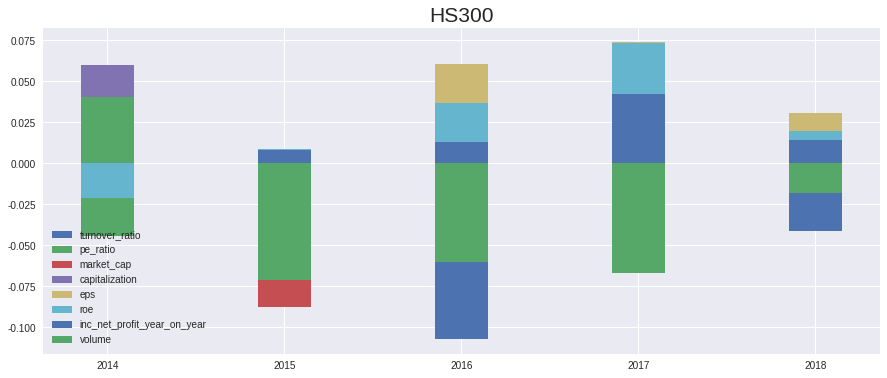

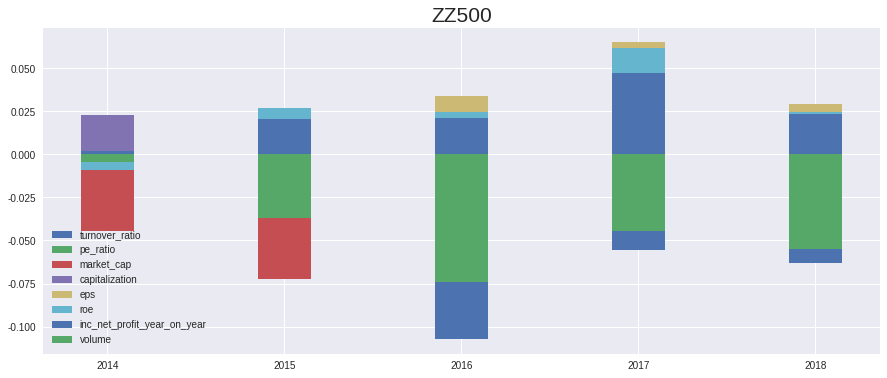

In [18]:
plt.legend()
plt.show()

根据表中结果可以得到以下结论：  
（1）各个因子在上证 50 中的波动性最大，HS300 其次，紧接着是 ZZ500 与全市场；  
（2）换手率因子在各个指数成分股中的波动性最大，净利润增长率因子在各个指数成分股中波动性最小； 

### 3.3.1 因子IC绝对值

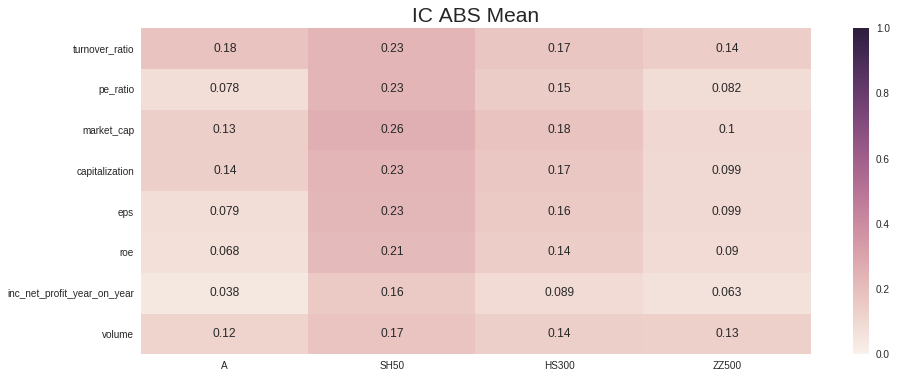

In [19]:
fig.show()

由上表可知，换手率因子在大部分指数中绝对值平均值最大，可见换手率因子的波动性最大，其次为市值因子，净利润增长率因子的绝对值平均值最小，该因子的波动性最小。由上可得到的结论与 IC 均值年度分析结果基本一致。 

如果分年度展示IC绝对值的平均值：

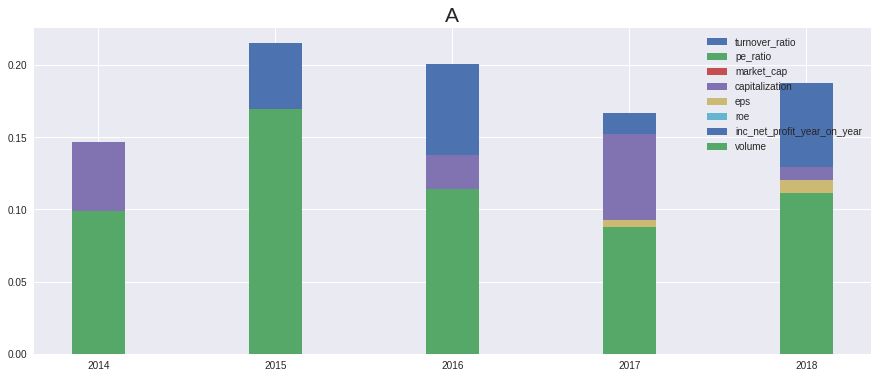

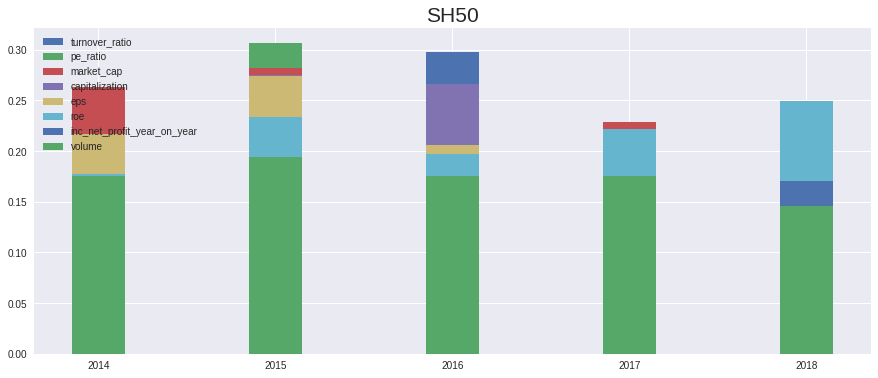

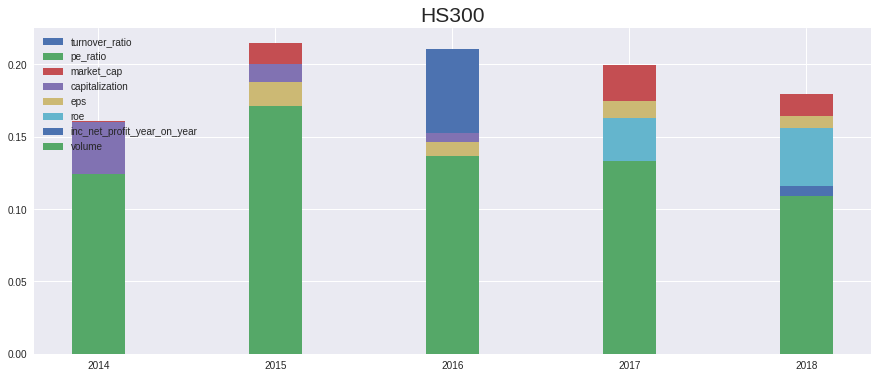

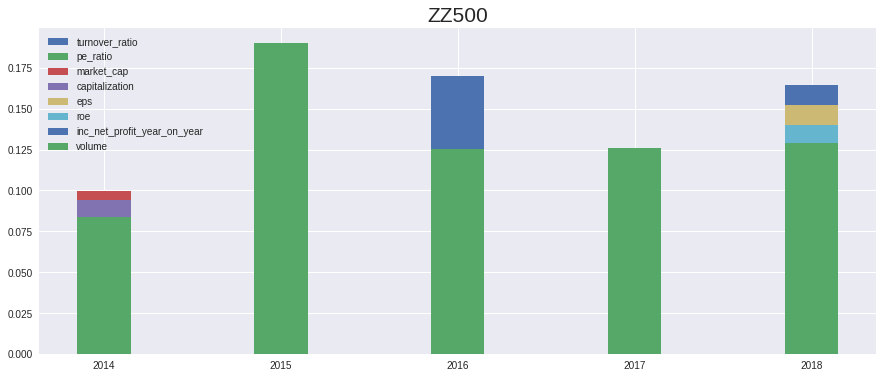

In [20]:
plt.legend()
plt.show()

也能佐证：除了换手率因子较强，净利润增长率较弱之外，其他因子的绝对的选股能力区别不大。

## 3.4 结论

组合的评判标准分为三点：因子暴露度、因子相关强度和因子选个股能力，相关结论如下：  
（1） 三大股指的市值和股本因子的偏离度均是最高的。中等偏离度的因子包括，换手率、ROE、PE、EPS 因子。偏离度最小的是净利润增长率因子。  
（2） 相关强度最低的组合为净利润增长率和成交量，换手率和 EPS，ROE 和换手率，股本和换手率。  
（3） 除了换手率因子较强，净利润增长率较弱之外，其他因子的选股能力区别不大。

可知综合选择暴露度高、相关强度低和选股能力强的因子，股本和换手率作为因子组合较为合适。

# 4 代码实现

数据准备：

In [ ]:
from jqdata import *
import datetime
import pandas as pd
import numpy as np
from six import StringIO
import warnings
import time
import pickle
from jqfactor import winsorize_med
from jqfactor import neutralize
from jqfactor import standardlize
import statsmodels.api as sm
warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.unicode_minus']=False

In [ ]:
#获取指定的交易周期列表
def get_period_date(peroid,start_date, end_date):
    #设定转换周期period_type  转换为周是'W',月'M',季度线'Q',五分钟'5min',12天'12D'
    stock_data = get_price('000001.XSHE',start_date,end_date,'daily',fields=['close'])
    #记录每个周期中最后一个交易日
    stock_data['date']=stock_data.index
    #进行转换，周线的每个变量都等于那一周中最后一个交易日的变量值
    period_stock_data=stock_data.resample(peroid,how='last')
    date=period_stock_data.index
    pydate_array = date.to_pydatetime()
    date_only_array = np.vectorize(lambda s: s.strftime('%Y-%m-%d'))(pydate_array )
    date_only_series = pd.Series(date_only_array)
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    start_date=start_date-datetime.timedelta(days=1)
    start_date = start_date.strftime("%Y-%m-%d")
    date_list=date_only_series.values.tolist()
    date_list.insert(0,start_date)
    TradeDate = []
    for i in date_list:
        temp = list(get_trade_days(end_date=i, count=1))[0]
        TradeDate.append(str(temp))
    return TradeDate

#获取回测所需的交易周期列表，以周为单位
start = time.clock()
begin_date = '2014-01-01'
end_date = '2019-01-01'
TradeDate = get_period_date('W',begin_date, end_date)
factorData = {}
for date in TradeDate:
    stockList = get_index_stocks('000002.XSHG',date) + get_index_stocks('399107.XSHE',date)
    df_volume = get_price(stockList, count = 1, end_date = date, frequency='1d', fields=['volume'])['volume']
    df_fund = get_fundamentals(query(valuation.code, valuation.turnover_ratio, valuation.pe_ratio, valuation.market_cap, \
                                    valuation.capitalization, indicator.eps, indicator.roe, indicator.inc_net_profit_year_on_year).filter(valuation.code.in_(stockList)), date = date)       

    df_fund = df_fund.set_index(['code'])
    df_fund['volume'] = df_volume.T
    factorData[date] = df_fund#factorData实际上是一个字典，其中股票代码和各因子值一一对应
#获取函数运行时长，单位为秒
elapsed = (time.clock() - start)

因子暴露分析：

In [ ]:
import matplotlib.pyplot as plt

Fields = ['turnover_ratio', 'pe_ratio', 'market_cap', 'capitalization', 'eps', 'roe', 'inc_net_profit_year_on_year', 'volume']
def getExplore(index):
    if index == 'SH50':
        index = '000016.XSHG'
    if index == 'HS300':
        index = '000300.XSHG'
    if index == 'ZZ500':
        index = '000905.XSHG'
    explore = pd.DataFrame(index = TradeDate)
    for i in Fields:#对于每一个单独的因子
        tempExplore = []
        for date in TradeDate:
            stockList = get_index_stocks(index, date)#获取指定日期的股票列表
            temp = factorData[date][[i]]#对于每一支股票和单独的因子，在每一个交易日下
            temp = temp.sort([i],ascending = False)#将每日因子从大到小排列
            temp['rank'] = range(len(temp)+1, 1, -1)#给排列好的因子加上序号
            #获取因子在某一交易日的暴露度
            tempExplore.append((temp.loc[stockList,'rank'].mean() - len(temp) / 2) / len(temp))
        explore[i] = tempExplore
    return explore
result_SH50 = []
result_HS300 = []
result_ZZ500 = []
explore1 = getExplore('SH50')
explore2 = getExplore('HS300')
explore3 = getExplore('ZZ500')
for i in Fields:#获取因子的平均暴露度
    result_SH50.append(explore1[i].mean())
    result_HS300.append(explore2[i].mean())
    result_ZZ500.append(explore3[i].mean())

In [ ]:
Year= ['2014', '2015', '2016', '2017', '2018']
Fields = ['turnover_ratio', 'pe_ratio', 'market_cap', 'capitalization', 'eps', 'roe', 'inc_net_profit_year_on_year', 'volume']
total1 = pd.DataFrame()
total2 = pd.DataFrame()
total3 = pd.DataFrame()
for i in range(len(Year)):#获取因子的年度平均暴露度
    total1[Year[i]] = explore1.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total2[Year[i]] = explore2.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total3[Year[i]] = explore3.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
x = np.array(range(len(Year)))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total1.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("SH50", fontsize=21)
# 添加图例
plt.legend()
plt.show()
x = np.array(range(len(Year)))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total2.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("HS300", fontsize=21)
# 添加图例
plt.legend()
plt.show()
x = np.array(range(len(Year)))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total3.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("ZZ500", fontsize=21)
# 添加图例
plt.legend()
plt.show()

因子相关性分析：

In [ ]:
def getCorr(index):#计算相关性
    if index == 'SH50':
        index = '000016.XSHG'
    if index == 'HS300':
        index = '000300.XSHG'
    if index == 'ZZ500':
        index = '000905.XSHG'
    corr = {}
    for date in TradeDate:
        stockList = get_index_stocks(index, date)
        temp = factorData[date].loc[stockList,:]
        corr[date] = temp.corr()
    corr = pd.Panel.from_dict(corr)
    return corr
corr_SH50 = getCorr('SH50')
corr_HS300 = getCorr('HS300')
corr_ZZ500 = getCorr('ZZ500')


In [ ]:
import seaborn as sns#计算相关性标准差，由corr_.mean实现
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(corr_SH50.mean(axis = 0), annot=True, vmax=1, vmin = 0)
ax.set_title("SH50", fontsize=21)
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(corr_HS300.mean(axis = 0), annot=True, vmax=1, vmin = 0)
ax.set_title("HS300", fontsize=21)
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(corr_ZZ500.mean(axis = 0), annot=True, vmax=1, vmin = 0)
ax.set_title("ZZ500", fontsize=21)
fig.show()

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(corr_SH50.std(axis = 0), annot=True, vmax=1, vmin = 0)
ax.set_title("SH50", fontsize=21)
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(corr_HS300.std(axis = 0), annot=True, vmax=1, vmin = 0)
ax.set_title("HS300", fontsize=21)
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(corr_ZZ500.std(axis = 0), annot=True, vmax=1, vmin = 0)
ax.set_title("ZZ500", fontsize=21)
fig.show()


In [ ]:
fig = plt.figure(figsize=(15,6))#计算相关强度
ax = fig.add_subplot(111)
sns.heatmap((corr_SH50.mean(axis = 0) / corr_SH50.std(axis = 0)).astype(int), annot=True, vmax=1, vmin = 0)
ax.set_title("SH50", fontsize=21)
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap((corr_HS300.mean(axis = 0) / corr_HS300.std(axis = 0)).astype(int), annot=True, vmax=1, vmin = 0)
ax.set_title("HS300", fontsize=21)
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap((corr_ZZ500.mean(axis = 0) / corr_ZZ500.std(axis = 0)).astype(int), annot=True, vmax=1, vmin = 0)
ax.set_title("ZZ500", fontsize=21)
fig.show()

IC值分析：

In [ ]:
import scipy.stats as st
def factor_IC_analysis(factorData, index):  
    if index == 'SH50':
        index = '000016.XSHG'
    if index == 'HS300':
        index = '000300.XSHG'
    if index == 'ZZ500':
        index = '000905.XSHG'
    if index == 'A':
        index = None
    IC = []
    for date in TradeDate[:-1]:
        if index:
            #取股票池
            stockList = get_index_stocks(index, date)
        else:
            stockList = list(factorData[date].index)
        #获取横截面收益率
        df_close=get_price(stockList, date, TradeDate[TradeDate.index(date)+1], 'daily', ['close'])
        if df_close.empty:
            continue
        #获取收益率的变化比率
        df_pchg=df_close['close'].iloc[-1,:]/df_close['close'].iloc[0,:]-1
        R_T = pd.DataFrame()
        R_T['pchg']=df_pchg
        IC_Field = []
        for i in Fields:
            #获取因子数据
            factor_data = factorData[date].loc[stockList, i]
            R_T['factor'] = factor_data
            R_T = R_T.dropna()
            IC_Field.append(st.pearsonr(R_T.pchg.rank(), R_T['factor'].rank())[0])
        IC.append(IC_Field)
    result = pd.DataFrame(index = TradeDate[:-1], columns = Fields, data = IC)
    result = result.dropna(how = 'all')
    return result
IC_SH50 = factor_IC_analysis(factorData, 'SH50')
IC_HS300 = factor_IC_analysis(factorData, 'HS300')
IC_ZZ500 = factor_IC_analysis(factorData, 'ZZ500')
IC_A = factor_IC_analysis(factorData, 'A')


In [ ]:
temp = pd.DataFrame()
temp['A'] = IC_A.mean()
temp['SH50'] = IC_SH50.mean()
temp['HS300'] = IC_HS300.mean()
temp['ZZ500'] = IC_ZZ500.mean()
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(temp, annot=True, vmax=1, vmin = 0)
ax.set_title("IC Mean", fontsize=21)
fig.show()

In [ ]:
#IC波动性计算
Year= ['2014', '2015', '2016', '2017', '2018']
Fields = ['turnover_ratio', 'pe_ratio', 'market_cap', 'capitalization', 'eps', 'roe', 'inc_net_profit_year_on_year', 'volume']
total1 = pd.DataFrame()
total2 = pd.DataFrame()
total3 = pd.DataFrame()
total4 = pd.DataFrame()
for i in range(len(Year)):
    total1[Year[i]] = IC_A.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total2[Year[i]] = IC_SH50.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total3[Year[i]] = IC_HS300.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total4[Year[i]] = IC_ZZ500.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
x = np.array(range(len(Year)))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total1.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("A", fontsize=21)
# 添加图例
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total2.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("SH50", fontsize=21)
# 添加图例
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total3.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("HS300", fontsize=21)
# 添加图例
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total4.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("ZZ500", fontsize=21)
# 添加图例
plt.legend()
plt.show()


In [ ]:
IC_A = abs(IC_A)#计算IC绝对值的平均值
IC_SH50 = abs(IC_SH50)
IC_HS300 = abs(IC_HS300)
IC_ZZ500 = abs(IC_ZZ500)
temp = pd.DataFrame()
temp['A'] = IC_A.mean()
temp['SH50'] = IC_SH50.mean()
temp['HS300'] = IC_HS300.mean()
temp['ZZ500'] = IC_ZZ500.mean()
fig.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
sns.heatmap(temp, annot=True, vmax=1, vmin = 0)
ax.set_title("IC ABS Mean", fontsize=21)
fig.show()


In [ ]:
#分年度计算并可视化IC年度绝对值的平均值
Year= ['2014', '2015', '2016', '2017', '2018']
Fields = ['turnover_ratio', 'pe_ratio', 'market_cap', 'capitalization', 'eps', 'roe', 'inc_net_profit_year_on_year', 'volume']
total1 = pd.DataFrame()
total2 = pd.DataFrame()
total3 = pd.DataFrame()
total4 = pd.DataFrame()
for i in range(len(Year)):
    total1[Year[i]] = IC_A.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total2[Year[i]] = IC_SH50.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total3[Year[i]] = IC_HS300.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
    total4[Year[i]] = IC_ZZ500.iloc[i*len(explore1)/5:(i+1)*len(explore1)/5,:].mean()
x = np.array(range(len(Year)))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total1.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("A", fontsize=21)
# 添加图例
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total2.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("SH50", fontsize=21)
# 添加图例
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total3.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("HS300", fontsize=21)
# 添加图例
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for i in Fields:
    plt.bar(x, total4.loc[i], 0.3, label = i)
plt.xticks(range(len(Year)), Year)
ax.set_title("ZZ500", fontsize=21)
# 添加图例
plt.legend()
plt.show()
